In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Portfolio/5 - Reinforcement Learning/2 - Thompson Sampling/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df_bandit = df[['TrafficType', 'Revenue']].copy()
df_bandit.head()

,TrafficType,Revenue
0,1,False
1,2,False
2,3,False
3,4,False
4,4,False


In [ ]:
df_bandit['Revenue'] = df_bandit['Revenue'].apply(lambda x: 1 if x == True or x == 1 else 0)

In [ ]:
arms = sorted(df_bandit['TrafficType'].unique())
num_arms = len(arms)

num_arms, arms

(20,
 [np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(7),
  np.int64(8),
  np.int64(9),
  np.int64(10),
  np.int64(11),
  np.int64(12),
  np.int64(13),
  np.int64(14),
  np.int64(15),
  np.int64(16),
  np.int64(17),
  np.int64(18),
  np.int64(19),
  np.int64(20)])

In [ ]:
arm_mapping = {arm: idx for idx, arm in enumerate(arms)}
df_bandit['Arm'] = df_bandit['TrafficType'].map(arm_mapping)

In [ ]:
df_bandit = df_bandit[['Arm', 'Revenue']]
df_bandit.head()

,Arm,Revenue
0,0,0
1,1,0
2,2,0
3,3,0
4,3,0


In [ ]:
import random

num_arms = df_bandit['Arm'].nunique()

# For each arm, keep track of:
# - number of rewards (successes)
# - number of failures
successes = [0] * num_arms
failures = [0] * num_arms

chosen_arms = []

In [ ]:
for i in range(len(df_bandit)):
    arm_selected = 0
    max_random_beta = 0

    # Draw a sample from Beta(success + 1, failure + 1) for each arm
    for arm in range(num_arms):
        random_beta = random.betavariate(successes[arm] + 1, failures[arm] + 1)

        if random_beta > max_random_beta:
            max_random_beta = random_beta
            arm_selected = arm

    chosen_arms.append(arm_selected)

    reward = df_bandit.iloc[i]['Revenue']

    if reward == 1:
        successes[arm_selected] += 1
    else:
        failures[arm_selected] += 1

In [ ]:
for arm in range(num_arms):
    total = successes[arm] + failures[arm]
    if total > 0:
        rate = successes[arm] / total
        print(f"Arm {arm}: {successes[arm]} successes, {failures[arm]} failures, rate={rate:.3f}")

Arm 0: 37 successes, 305 failures, rate=0.108
Arm 1: 6 successes, 89 failures, rate=0.063
Arm 2: 6 successes, 104 failures, rate=0.055
Arm 3: 15 successes, 167 failures, rate=0.082
Arm 4: 1029 successes, 4185 failures, rate=0.197
Arm 5: 83 successes, 611 failures, rate=0.120
Arm 6: 10 successes, 97 failures, rate=0.093
Arm 7: 93 successes, 692 failures, rate=0.118
Arm 8: 44 successes, 378 failures, rate=0.104
Arm 9: 2 successes, 66 failures, rate=0.029
Arm 10: 39 successes, 352 failures, rate=0.100
Arm 11: 21 successes, 204 failures, rate=0.093
Arm 12: 28 successes, 180 failures, rate=0.135
Arm 13: 178 successes, 925 failures, rate=0.161
Arm 14: 19 successes, 182 failures, rate=0.095
Arm 15: 95 successes, 505 failures, rate=0.158
Arm 16: 146 successes, 816 failures, rate=0.152
Arm 17: 3 successes, 77 failures, rate=0.037
Arm 18: 45 successes, 380 failures, rate=0.106
Arm 19: 9 successes, 107 failures, rate=0.078


In [ ]:
best_arm = max(range(num_arms), key=lambda a: successes[a] / (successes[a] + failures[a] + 1e-10))
best_arm

4

In [ ]:
results = []

for arm in range(num_arms):
    s = successes[arm]
    f = failures[arm]
    total = s + f
    rate = s / total if total > 0 else 0
    results.append([arm, total, s, f, rate])

results_df = pd.DataFrame(results, columns=['Arm', 'Total_Shown', 'Success', 'Failure', 'Conversion_Rate'])
results_df.sort_values(by='Conversion_Rate', ascending=False)


,Arm,Total_Shown,Success,Failure,Conversion_Rate
4,4,5214,1029,4185,0.197353
13,13,1103,178,925,0.161378
15,15,600,95,505,0.158333
16,16,962,146,816,0.151767
12,12,208,28,180,0.134615
5,5,694,83,611,0.119597
7,7,785,93,692,0.118471
0,0,342,37,305,0.108187
18,18,425,45,380,0.105882
8,8,422,44,378,0.104265


In [ ]:
inverse_mapping = {v: k for k, v in arm_mapping.items()}
inverse_mapping[3]

np.int64(4)

In [ ]:
results_df


,Arm,Total_Shown,Success,Failure,Conversion_Rate
0,0,342,37,305,0.108187
1,1,95,6,89,0.063158
2,2,110,6,104,0.054545
3,3,182,15,167,0.082418
4,4,5214,1029,4185,0.197353
5,5,694,83,611,0.119597
6,6,107,10,97,0.093458
7,7,785,93,692,0.118471
8,8,422,44,378,0.104265
9,9,68,2,66,0.029412


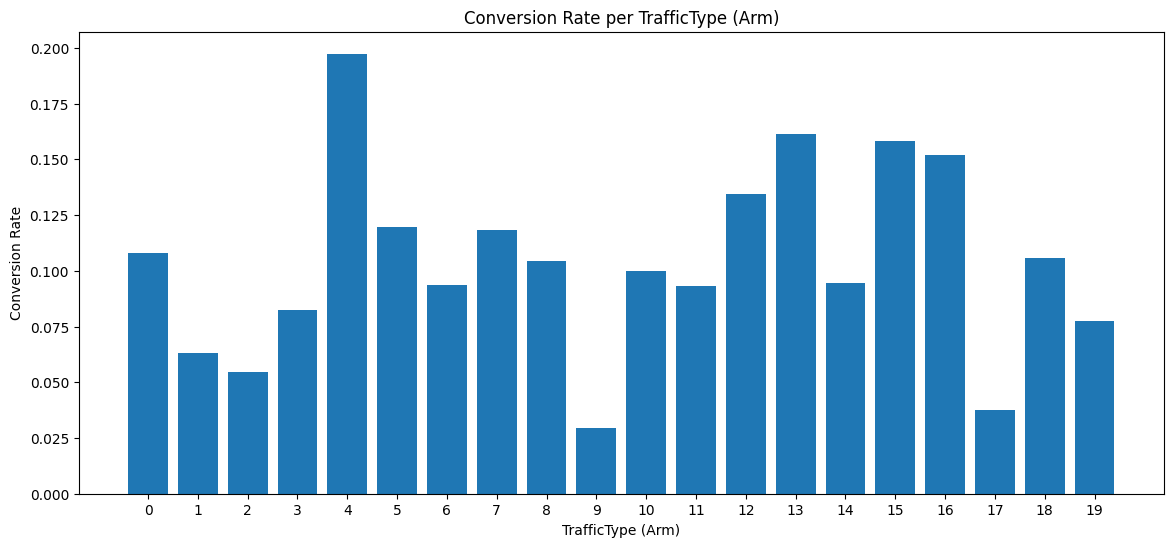

In [ ]:
plt.figure(figsize=(14, 6))

plt.bar(results_df['Arm'], results_df['Conversion_Rate'])

plt.title("Conversion Rate per TrafficType (Arm)")
plt.xlabel("TrafficType (Arm)")
plt.ylabel("Conversion Rate")

plt.xticks(results_df['Arm'])

plt.show()
